In [13]:
from matplotlib.pyplot import figure
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import nxviz.plots as nv
import nxviz as nv
from nxviz import annotate

In [14]:
df = pd.read_csv(r'/Users/hernanadasme/Projects/data_challenges/exports_29_11/rectype-63.csv')

In [15]:
df.rename({'Source': 'source'}, axis = 1, inplace=True)
df.rename({'Source year': 'source_year'}, axis = 1, inplace=True)
df.rename({'Boxers challenging RecordTitle': 'boxer_challenging'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged RecordTitle': 'boxer_challenged'}, axis = 1, inplace=True)
df.rename({'Location Description': 'location_descp'}, axis = 1, inplace=True)
df.rename({'Status': 'status'}, axis = 1, inplace=True)
df.rename({'Conditions': 'condition'}, axis = 1, inplace=True)
df.rename({'City':'city'}, axis = 1, inplace=True)
df.rename({'Location':'location'}, axis = 1, inplace=True)
df.rename({'Challenge H-ID': 'challenge_id'}, axis = 1, inplace=True)
df.rename({'Boxers challenging H-ID': 'challenging_id'}, axis = 1, inplace=True)
df.rename({'Boxer Challenged H-ID': 'challenged_id'}, axis = 1, inplace=True)

In [77]:
df.head(1)

,challenge_id,rec_Title,source,source_year,challenging_id,boxer_challenging,challenged_id,boxer_challenged,status,condition,Basis,location_descp,city,location,weight
0,969,Castillo\nBaeza,Semanario La Prensa. Los Andes,1928-03-02,865,"Castillo, Ernesto",836,"Baeza, Florencio",NaN,NaN,NaN,NaN,NaN,POINT(-70.597218 -32.833799),2


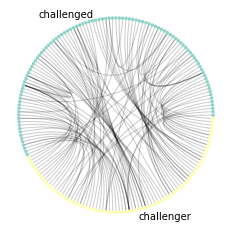

In [45]:
#import package
from nxviz import CircosPlot

D = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id')
D.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
D.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
D.edges()
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.
c = CircosPlot(D, node_grouping = 'bipartite', node_color = 'bipartite')
annotate.circos_group(D, group_by="bipartite")
#fig2 = plt.gcf()
#fig2.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_04.jpg", dpi=600)

In [46]:
print(D.nodes(data=True))
print(D.edges(data=True))

[(865, {'bipartite': 'challenger'}), (836, {'bipartite': 'challenged'}), (882, {'bipartite': 'challenged'}), (780, {'bipartite': 'challenged'}), (833, {'bipartite': 'challenged'}), (272, {'bipartite': 'challenged'}), (976, {'bipartite': 'challenger'}), (827, {'bipartite': 'challenged'}), (189, {'bipartite': 'challenger'}), (987, {'bipartite': 'challenged'}), (302, {'bipartite': 'challenger'}), (303, {'bipartite': 'challenged'}), (891, {'bipartite': 'challenger'}), (573, {'bipartite': 'challenged'}), (158, {'bipartite': 'challenger'}), (1001, {'bipartite': 'challenged'}), (1003, {'bipartite': 'challenger'}), (321, {'bipartite': 'challenged'}), (647, {'bipartite': 'challenger'}), (423, {'bipartite': 'challenged'}), (1006, {'bipartite': 'challenged'}), (1008, {'bipartite': 'challenged'}), (332, {'bipartite': 'challenger'}), (1010, {'bipartite': 'challenged'}), (1012, {'bipartite': 'challenged'}), (502, {'bipartite': 'challenger'}), (1014, {'bipartite': 'challenged'}), (143, {'bipartite': 

In [92]:
# Adding metadata attributes to the nodes
for box, row in df.iterrows():
    D.nodes[row['challenging_id']]['name'] = row['boxer_challenging']
    D.nodes[row['challenged_id']]['name'] = row['boxer_challenged']
#print(B.nodes(data=True))
print(len(D.nodes()))

180


In [94]:
# Add the degree centrality score of each node to their metadata dictionary
dcs = nx.degree_centrality(D)
for n in D.nodes():
    D.nodes[n]['centrality'] = dcs[n]

In [95]:
print(D.nodes(data=True))

[(865, {'bipartite': 'challenger', 'name': 'Castillo, Ernesto', 'centrality': 0.00558659217877095}), (836, {'bipartite': 'challenged', 'name': 'Baeza, Florencio', 'centrality': 0.03910614525139665}), (882, {'bipartite': 'challenged', 'name': 'Araya, Manuel', 'centrality': 0.0111731843575419}), (780, {'bipartite': 'challenged', 'name': 'Bolli, Carlos', 'centrality': 0.00558659217877095}), (833, {'bipartite': 'challenged', 'name': 'Valdes, Mario', 'centrality': 0.0223463687150838}), (272, {'bipartite': 'challenged', 'name': 'Pérez, Amador', 'centrality': 0.00558659217877095}), (976, {'bipartite': 'challenger', 'name': 'Ortiz, Rafael', 'centrality': 0.00558659217877095}), (827, {'bipartite': 'challenged', 'name': 'Gallardo, Pedro', 'centrality': 0.00558659217877095}), (189, {'bipartite': 'challenger', 'name': 'Silva, Carlos', 'centrality': 0.00558659217877095}), (987, {'bipartite': 'challenged', 'name': 'Iñiguez, Mario', 'centrality': 0.00558659217877095}), (302, {'bipartite': 'challenger

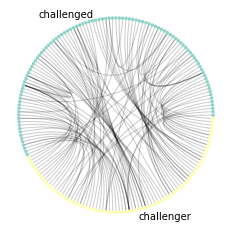

In [58]:
#import package
from nxviz import CircosPlot

F = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id')
F.add_nodes_from(df['challenging_id'], bipartite = 'challenger')
F.add_nodes_from(df['challenged_id'], bipartite = 'challenged')
F.edges()
#To be most informative and communicative, a graph visualization should first prioritize node placement 
#in a fashion that makes sense.
f = CircosPlot(D, node_grouping = 'bipartite', node_color = 'bipartite')
annotate.circos_group(D, group_by="bipartite")
#fig2 = plt.gcf()
#fig2.savefig("/Users/hernanadasme/Documents/data_challenges/graph_presentation_04.jpg", dpi=600)

In [60]:
nx.is_weighted(F)

False

In [67]:
df['weight'] = df.groupby(['challenging_id', 'challenged_id'])['challenging_id'].transform('size')

A = nx.from_pandas_edgelist(df, 'challenging_id', 'challenged_id',
                            create_using=nx.DiGraph(), edge_attr='weight')

In [68]:
A.edges(data=True)

OutEdgeDataView([(865, 836, {'weight': 2}), (836, 826, {'weight': 1}), (836, 833, {'weight': 1}), (882, 780, {'weight': 1}), (833, 272, {'weight': 2}), (833, 827, {'weight': 2}), (976, 882, {'weight': 2}), (189, 987, {'weight': 1}), (302, 303, {'weight': 1}), (891, 573, {'weight': 2}), (158, 1001, {'weight': 1}), (1003, 321, {'weight': 1}), (647, 423, {'weight': 1}), (647, 1006, {'weight': 1}), (647, 1008, {'weight': 1}), (647, 1314, {'weight': 1}), (332, 1010, {'weight': 1}), (332, 1012, {'weight': 1}), (1012, 1261, {'weight': 1}), (502, 1014, {'weight': 1}), (143, 572, {'weight': 1}), (143, 573, {'weight': 1}), (77, 146, {'weight': 1}), (639, 1021, {'weight': 2}), (639, 735, {'weight': 1}), (639, 1024, {'weight': 1}), (639, 1026, {'weight': 1}), (639, 156, {'weight': 1}), (639, 420, {'weight': 1}), (639, 935, {'weight': 1}), (1026, 276, {'weight': 1}), (732, 223, {'weight': 1}), (732, 733, {'weight': 1}), (163, 1031, {'weight': 1}), (162, 1035, {'weight': 1}), (175, 98, {'weight': 1}

In [71]:
# Calculating the degree centrality of G_ch
deg_cen_A = nx.degree_centrality(A)

In [73]:
# Sorting the dictionaries according to their degree centrality and extracting the top 10
sorted_deg_cen_A = sorted(deg_cen_A.items(), key=lambda x:x[1], reverse=True)

**Analyzing the Network**

In [78]:
graph_box  = nx.Graph()

#Add Edges based on the dataframe (nodes gets added automatically)
for i,row in df.iterrows():
    graph_box.add_edge(row['boxer_challenging'],  
                        row['boxer_challenged'],   
                        weight=row['weight'])


#Print network summary
print("Network summary: \n-----------------\n", nx.info(graph_box))

Network summary: 
-----------------
 Graph with 180 nodes and 120 edges


In [86]:
#Function to sort a dictionary by value
def sort_dict(dict):
    sorted_dict= sorted(dict.items(), key=lambda x: x[1],reverse=True)
    
    for key,value in sorted_dict:
        print(key, " = ", value)

In [87]:
#find number of nodes they are connected with
print("\nNodes Gonzalez, Johnston is connected with :\n-------------------------------")
print(nx.degree(graph_box,'Gonzalez, Johnston'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n----------------------")
sort_dict(nx.clustering(graph_box,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(graph_box))

print("\nBetweenness:\n--------------")
sort_dict(nx.betweenness_centrality(graph_box))


Nodes Gonzalez, Johnston is connected with :
-------------------------------
7

Clustering Co-efficient:
----------------------
Castillo, Ernesto  =  0
Baeza, Florencio  =  0
Araya, Manuel  =  0
Bolli, Carlos  =  0
Valdes, Mario  =  0
Pérez, Amador  =  0
Ortiz, Rafael  =  0
Gallardo, Pedro  =  0
Silva, Carlos  =  0
Iñiguez, Mario  =  0
Flores, Sara  =  0
Farrafino, Clementina  =  0
Huerta, Francisco  =  0
Giaverini, Oscar  =  0
Tapia, Julio  =  0
Inostroza, Ruperto  =  0
Alley, Juan  =  0
Salinas, Juan  =  0
Olguín, Humberto  =  0
Valdenegro  =  0
Henriquez  =  0
Leiva  =  0
Acosta, Luis J.  =  0
Molina, Erasmo  =  0
Parra, Routier  =  0
Rios, Agustin  =  0
Arratia, Jose  =  0
Caldera, Francisco  =  0
Anguita, Oscar  =  0
Guerrero, Angel  =  0
Lasseube, Enrique  =  0
Gonzalez, Johnston  =  0
Suarez, Pablo  =  0
Correa, Luis  =  0
Cipry, John  =  0
Saavedra, Clemente  =  0
Villablanca, Luis  =  0
Jaña, Andres  =  0
Meza, Fernando  =  0
García, Francisco  =  0
Valdivieso, Raul  =  0
Gue

In [88]:
#find number of nodes they are connected with
print("\nNodes Gonzalez, Johnston is connected with :\n-------------------------------")
print(nx.degree(A,'Gonzalez, Johnston'))

#clustering - how close a team they form
print("\nClustering Co-efficient:\n----------------------")
sort_dict(nx.clustering(A,weight='weight'))

#Find centrality of nodes
print("\nCentrality :\n---------------")
sort_dict(nx.degree_centrality(A))

print("\nBetweenness:\n--------------")
sort_dict(nx.betweenness_centrality(A))


Nodes Gonzalez, Johnston is connected with :
-------------------------------
[]

Clustering Co-efficient:
----------------------
865  =  0
836  =  0
882  =  0
780  =  0
833  =  0
272  =  0
976  =  0
827  =  0
189  =  0
987  =  0
302  =  0
303  =  0
891  =  0
573  =  0
158  =  0
1001  =  0
1003  =  0
321  =  0
647  =  0
423  =  0
1006  =  0
1008  =  0
332  =  0
1010  =  0
1012  =  0
502  =  0
1014  =  0
143  =  0
572  =  0
77  =  0
146  =  0
639  =  0
1021  =  0
735  =  0
1024  =  0
1026  =  0
732  =  0
223  =  0
733  =  0
163  =  0
1031  =  0
162  =  0
1035  =  0
175  =  0
98  =  0
174  =  0
1038  =  0
177  =  0
1040  =  0
178  =  0
126  =  0
185  =  0
1043  =  0
933  =  0
934  =  0
935  =  0
936  =  0
1048  =  0
937  =  0
938  =  0
939  =  0
1079  =  0
1080  =  0
1138  =  0
276  =  0
535  =  0
1142  =  0
1141  =  0
1145  =  0
1146  =  0
439  =  0
1149  =  0
1150  =  0
1151  =  0
14  =  0
1131  =  0
1154  =  0
1155  =  0
1157  =  0
1158  =  0
1160  =  0
339  =  0
1162  =  0
1163  =  0

In [90]:
print(F.nodes(data=True))

[(865, {'bipartite': 'challenger'}), (836, {'bipartite': 'challenged'}), (882, {'bipartite': 'challenged'}), (780, {'bipartite': 'challenged'}), (833, {'bipartite': 'challenged'}), (272, {'bipartite': 'challenged'}), (976, {'bipartite': 'challenger'}), (827, {'bipartite': 'challenged'}), (189, {'bipartite': 'challenger'}), (987, {'bipartite': 'challenged'}), (302, {'bipartite': 'challenger'}), (303, {'bipartite': 'challenged'}), (891, {'bipartite': 'challenger'}), (573, {'bipartite': 'challenged'}), (158, {'bipartite': 'challenger'}), (1001, {'bipartite': 'challenged'}), (1003, {'bipartite': 'challenger'}), (321, {'bipartite': 'challenged'}), (647, {'bipartite': 'challenger'}), (423, {'bipartite': 'challenged'}), (1006, {'bipartite': 'challenged'}), (1008, {'bipartite': 'challenged'}), (332, {'bipartite': 'challenger'}), (1010, {'bipartite': 'challenged'}), (1012, {'bipartite': 'challenged'}), (502, {'bipartite': 'challenger'}), (1014, {'bipartite': 'challenged'}), (143, {'bipartite': 

In [ ]:
from networkx.algorithms import bipartite
G = bipartite.projected_graph(graph_box, boxer_nodes, multigraph=False)